In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("./data"))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

['weatherHistory.csv']


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors 
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve

In [3]:
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [4]:
data = pd.read_csv('./data/weatherHistory.csv', sep=",")

https://www.kaggle.com/budincsevity/szeged-weather

**Задача: на основе имеющихся данных о влажности, осадках, облачности и т.д. предсказать температуру**

In [5]:
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [6]:
#датасет не имеет пропущенных значений категориальных признаков
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [7]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


C:\Users\pisar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


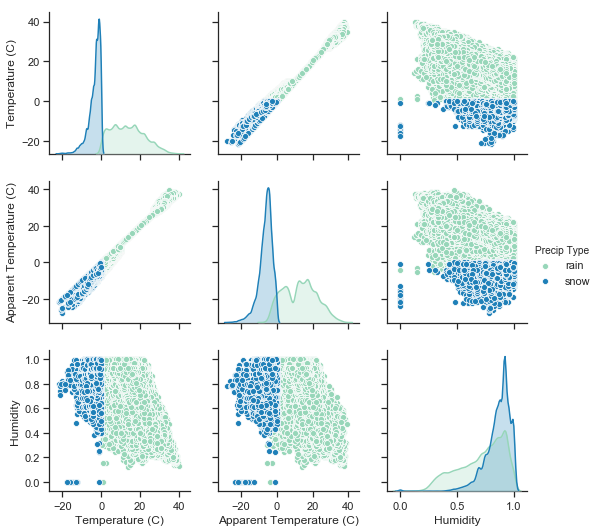

In [8]:
sns.pairplot(data[["Precip Type","Temperature (C)","Apparent Temperature (C)","Humidity"]],
             hue="Precip Type",
             palette="YlGnBu");

**Распределение температуры**

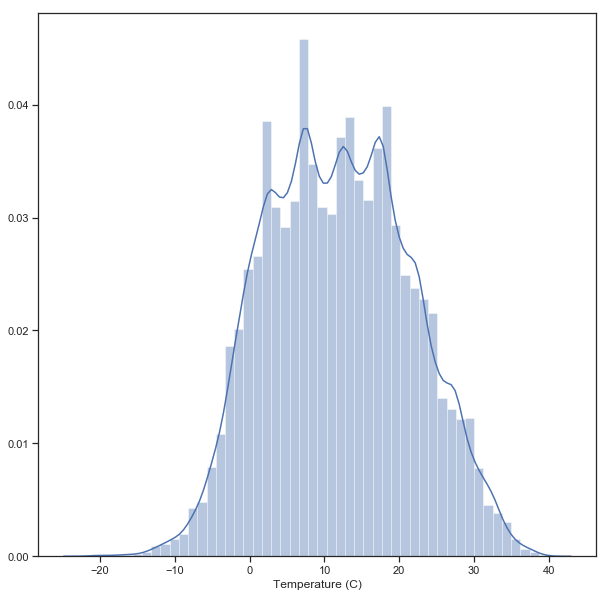

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Temperature (C)'])

**Соотношение температуры и облачности**

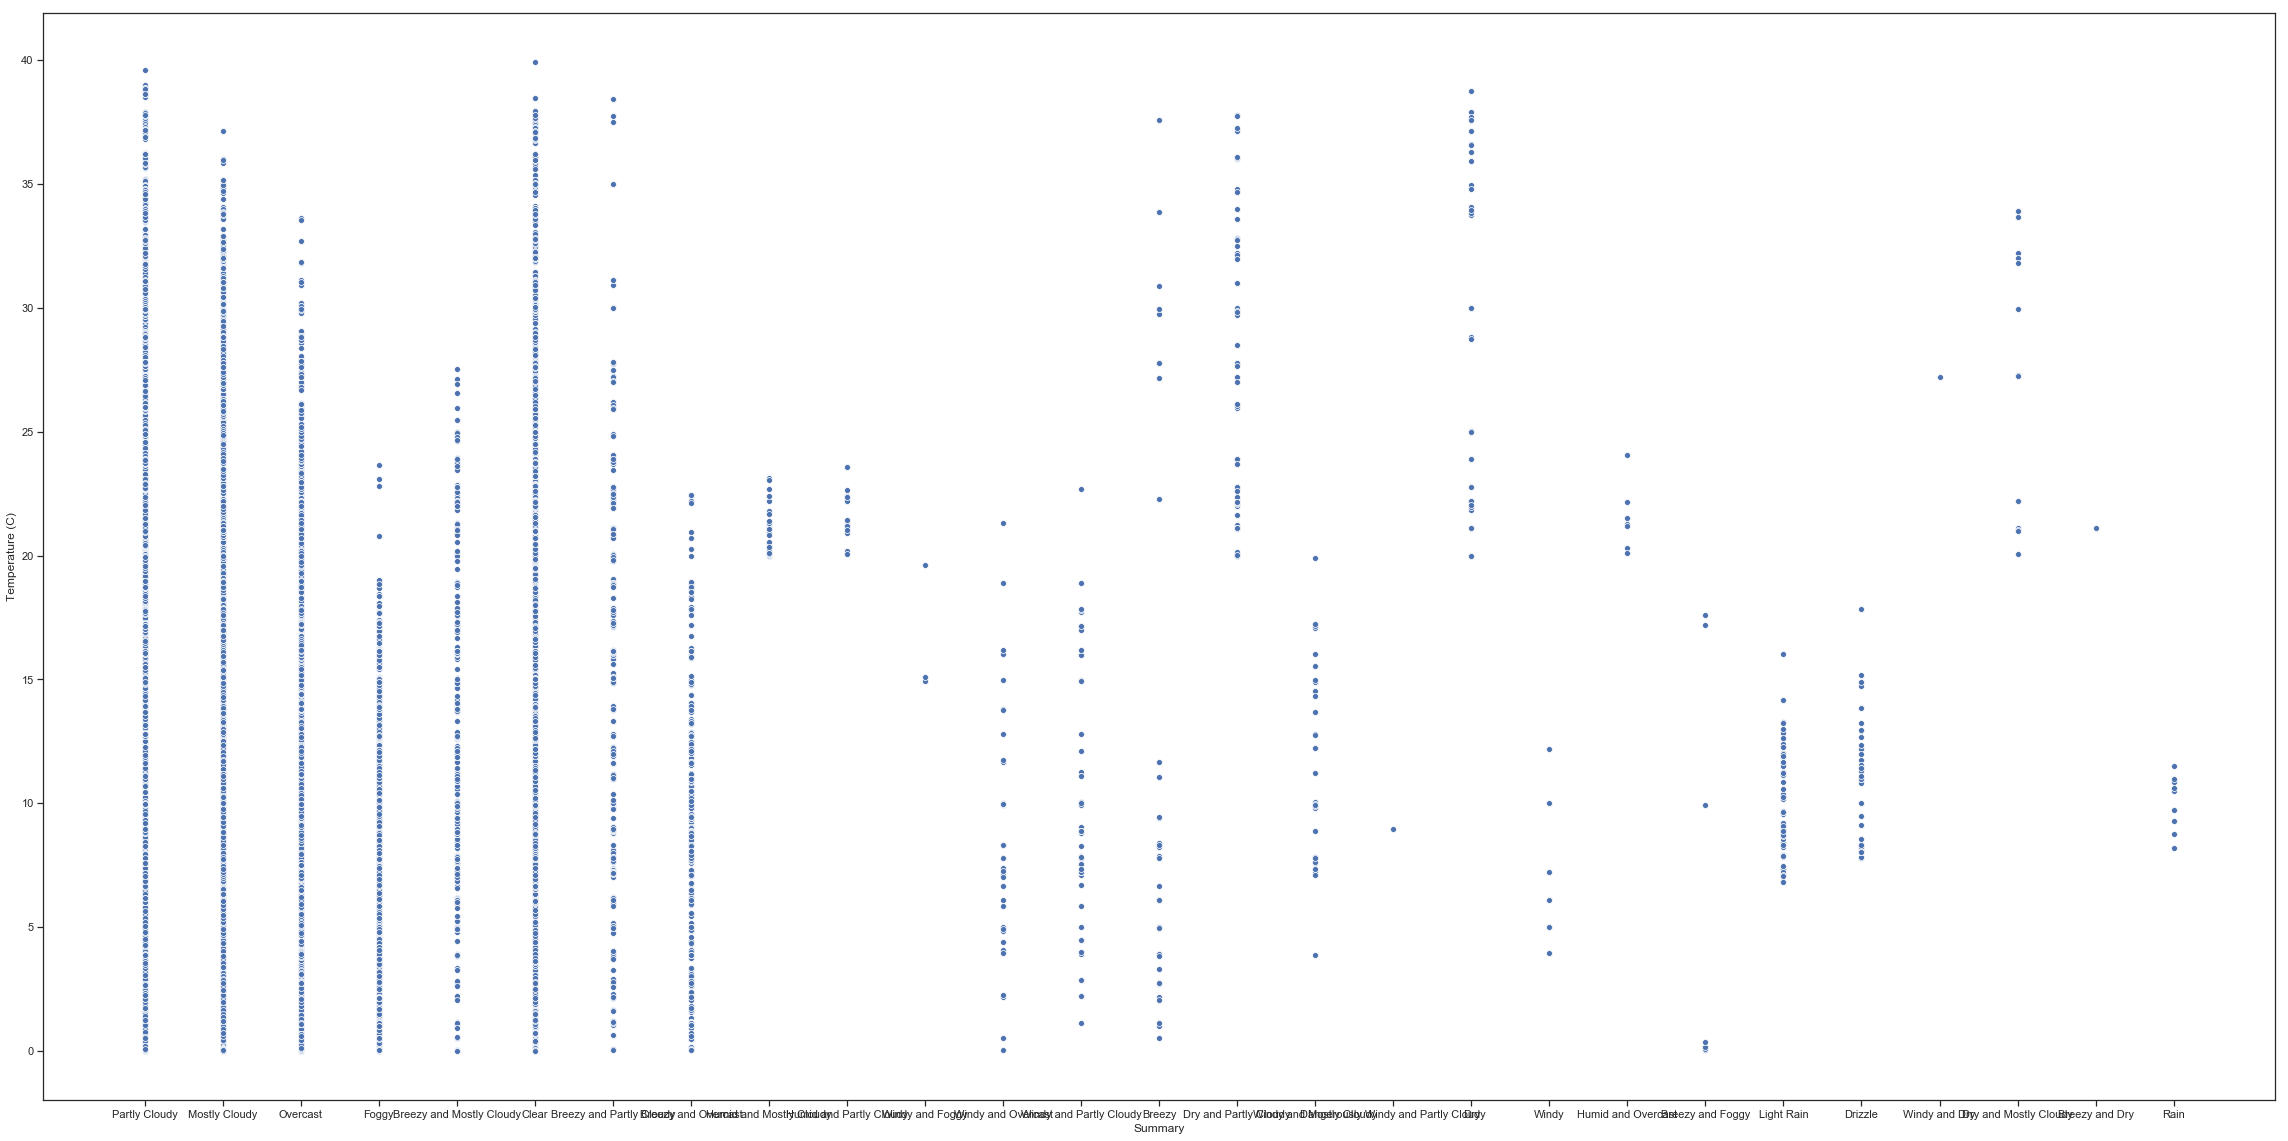

In [10]:
fig, ax = plt.subplots(figsize=(40,20)) 
sns.scatterplot(ax=ax, x=data.Summary[data['Temperature (C)']>0], y='Temperature (C)', data=data)

**Соотношение влажности и температуры**

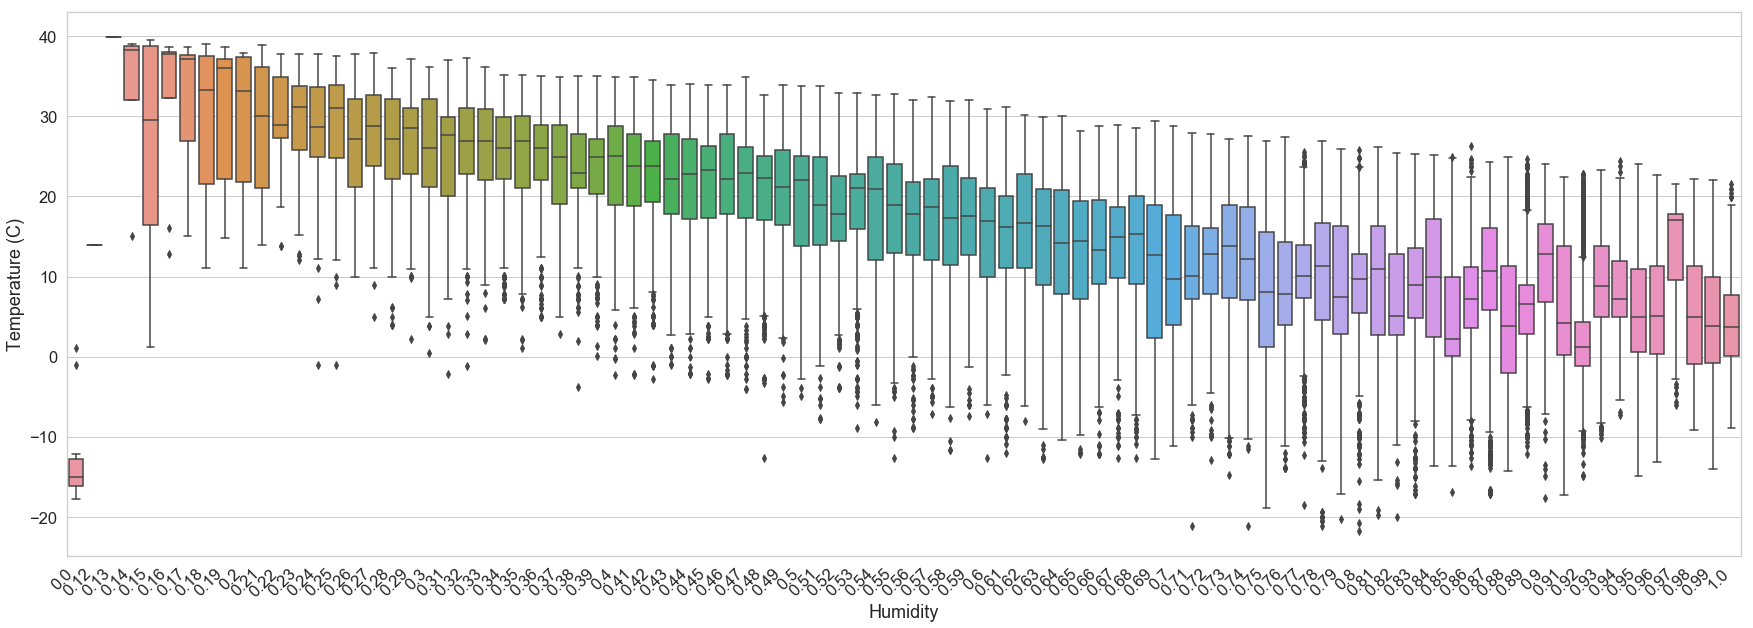

In [11]:
sns.set(rc={'figure.figsize':(30,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Humidity",y="Temperature (C)",data=data)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')

**Корреляционная матрица**

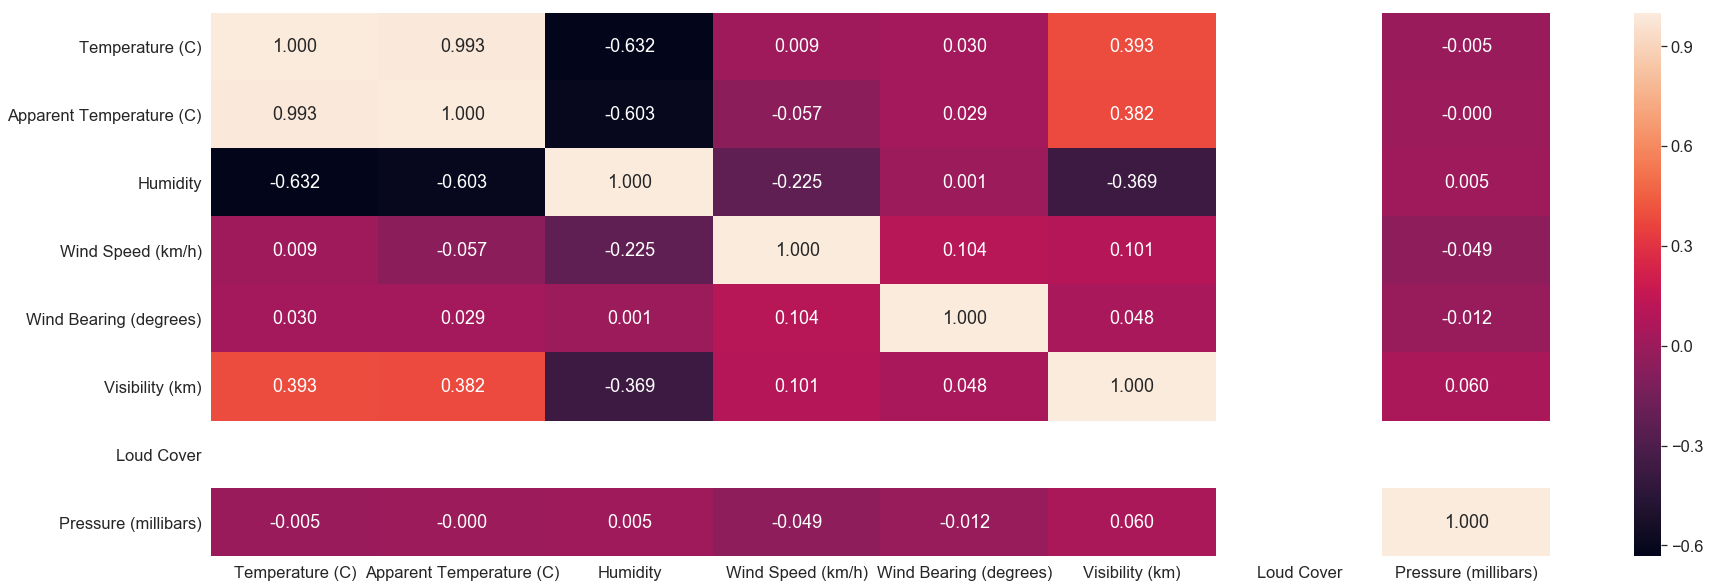

In [12]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

Необходимо удалить: Loud Cover

In [13]:
data.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


In [14]:
# преобразование поля Formatted Date
datetime = pd.to_datetime(data["Formatted Date"])
datetime = datetime.apply(lambda x: x+pd.Timedelta(hours=2))
data["Month"] = datetime.apply(lambda x: x.month)
data["Day"] = datetime.apply(lambda x: x.day)
data["WoY"] = datetime.apply(lambda x: x.week)
data["Hour"] = datetime.apply(lambda x: x.hour)

In [15]:
data = data.drop('Formatted Date', axis=1)
data = data.drop('Loud Cover', axis=1)
data = data.drop('Daily Summary', axis=1)
data = data.dropna(axis=0, how='any')

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Precip Type'] = le.fit_transform(data['Precip Type'])
data['Summary'] = le.fit_transform(data['Summary'])

In [17]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,WoY,Hour
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,4,1,13,0
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,4,1,13,1
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4,1,13,2
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,4,1,13,3
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,4,1,13,4


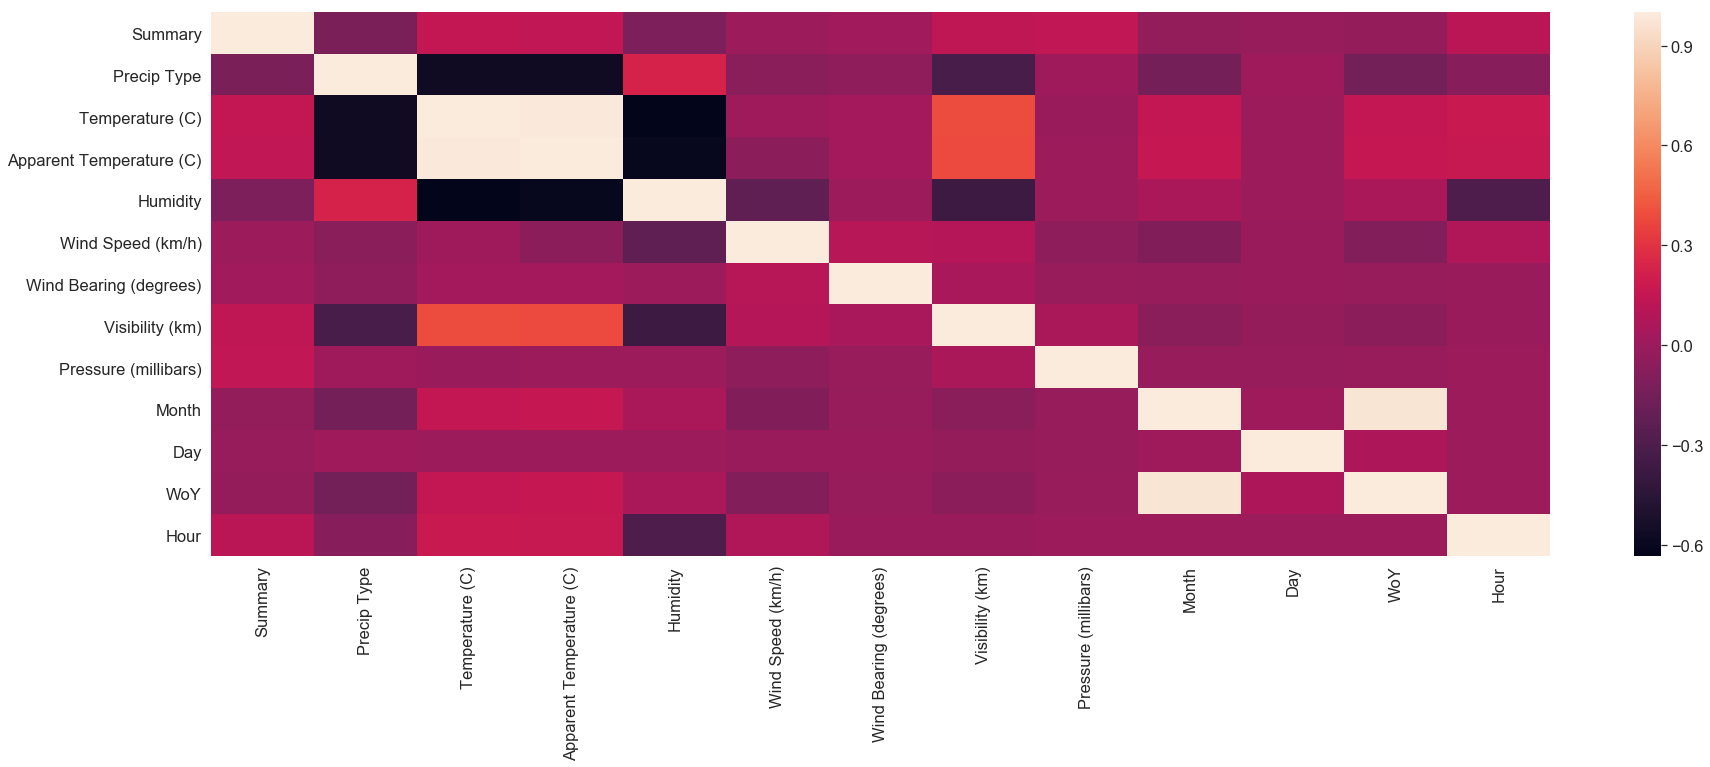

In [18]:
sns.heatmap(data.corr())

Apparent temperature - кажущаяся температура

In [19]:
temp = data['Temperature (C)']
data = data.drop('Temperature (C)', axis=1)
data = data.drop('Apparent Temperature (C)', axis=1)
print(data.head())
print(temp.head())

   Summary  Precip Type  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
0       19            0      0.89            14.1197                   251.0   
1       19            0      0.86            14.2646                   259.0   
2       17            0      0.89             3.9284                   204.0   
3       19            0      0.83            14.1036                   269.0   
4       17            0      0.83            11.0446                   259.0   

   Visibility (km)  Pressure (millibars)  Month  Day  WoY  Hour  
0          15.8263               1015.13      4    1   13     0  
1          15.8263               1015.63      4    1   13     1  
2          14.9569               1015.94      4    1   13     2  
3          15.8263               1016.41      4    1   13     3  
4          15.8263               1016.51      4    1   13     4  
0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature (C), dtype: float64


**Разделение выборки**

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    data, temp, test_size=0.3, random_state=1)

**Метрики для оценки регрессионных моделей:**

1. mean absolute error - средняя ошибка
2. mean squared error - среднеквадратичная ошибка
3. explained variance score - оценка дисперсии

**Baseline**

knn

In [21]:
knn_start = neighbors.KNeighborsRegressor(n_neighbors=5)
knn_start.fit(x_train, y_train)
target1_0 = knn_start.predict(x_train)
target1_1 = knn_start.predict(x_test)

In [22]:
print('mae for x_train: ',mean_absolute_error(y_train, target1_0))
print('mae for x_test: ',mean_absolute_error(y_test, target1_1))
print('mse: ', mean_squared_error(y_test, target1_1))
print('explained variance score: ', explained_variance_score(y_test, target1_1))

mae for x_train:  2.4059163460981647
mae for x_test:  2.972575696157573
mse:  15.13055823320512
explained variance score:  0.8350006384795441


Bayesian Ridge

In [23]:
br_start = linear_model.BayesianRidge()
br_start.fit(x_train, y_train)
target_br_start = br_start.predict(x_test)

In [24]:
print('mae for x_test: ',mean_absolute_error(y_test, target_br_start))
print('mse: ', mean_squared_error(y_test, target_br_start))
print('explained variance score: ', explained_variance_score(y_test, target_br_start))

mae for x_test:  4.8025134881042195
mse:  34.48675556608117
explained variance score:  0.6222298033041633


Random forest

In [25]:
rf_start = RandomForestRegressor()
rf_start.fit(x_train, y_train)
target_rf_start = rf_start.predict(x_test)

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [26]:
print('mae for x_test: ',mean_absolute_error(y_test, target_rf_start))
print('mse: ', mean_squared_error(y_test, target_rf_start))
print('explained variance score: ', explained_variance_score(y_test, target_rf_start))

mae for x_test:  1.5994261260322205
mse:  4.6921255506998145
explained variance score:  0.9486013642985321


Gradient boosting

In [27]:
gb_start = GradientBoostingRegressor()
gb_start.fit(x_train, y_train)
target_gb_start = gb_start.predict(x_test)

In [28]:
print('mae for x_test: ',mean_absolute_error(y_test, target_gb_start))
print('mse: ', mean_squared_error(y_test, target_gb_start))
print('explained variance score: ', explained_variance_score(y_test, target_gb_start))

mae for x_test:  2.344259343143967
mse:  8.647360592483661
explained variance score:  0.9052749971401852


Bagging

In [29]:
br_start = BaggingRegressor()
br_start.fit(x_train, y_train)
target_br_start = br_start.predict(x_test)

In [30]:
print('mae for x_test: ',mean_absolute_error(y_test, target_br_start))
print('mse: ', mean_squared_error(y_test, target_br_start))
print('explained variance score: ', explained_variance_score(y_test, target_br_start))

mae for x_test:  1.5909384470464696
mse:  4.661214908744666
explained variance score:  0.948940516040419


**Grid Search**

knn

In [31]:
tuned_parameters = {'n_neighbors': range(1,30,5)}
clf_gs = GridSearchCV(neighbors.KNeighborsRegressor(), tuned_parameters, cv=5)
clf_gs.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 30, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
clf_gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=6, p=2,
          weights='uniform')

In [33]:
clf_gs.best_score_

0.8209144053447514

In [34]:
cls_best_knn = clf_gs.best_estimator_.fit(x_train, y_train)
target1_1_knn = cls_best_knn.predict(x_test)
print('mae for x_test: ',mean_absolute_error(y_test, target1_1_knn))
print('mse: ', mean_squared_error(y_test, target1_1_knn))
print('explained variance score: ', explained_variance_score(y_test, target1_1_knn))

mae for x_test:  2.9925149629320784
mse:  15.176634719334537
explained variance score:  0.834673134145544


Bayessian ridge

In [35]:
tuned_parameters = {'n_iter': range(100,500,50)}
clf_brd = GridSearchCV(linear_model.BayesianRidge(), tuned_parameters, cv=5)
clf_brd.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_iter': range(100, 500, 50)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [36]:
clf_brd.best_estimator_

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=100,
       normalize=False, tol=0.001, verbose=False)

In [37]:
clf_brd.best_score_

0.622656534034542

In [38]:
cls_best_br = clf_brd.best_estimator_.fit(x_train, y_train)
target1_1_br = cls_best_br.predict(x_test)
print('mae for x_test: ',mean_absolute_error(y_test, target1_1_br))
print('mse: ', mean_squared_error(y_test, target1_1_br))
print('explained variance score: ', explained_variance_score(y_test, target1_1_br))

mae for x_test:  4.8025134881042195
mse:  34.48675556608117
explained variance score:  0.6222298033041633


Random forest

In [39]:
parameters_random_forest = {'n_estimators':[1, 3, 5, 7, 10], 
                            'max_depth':[1, 3, 5, 7, 10],
                            'random_state':[0, 2, 4, 6, 8, 10],
                           'max_features':['auto', 'sqrt']}
best_random_forest = GridSearchCV(RandomForestRegressor(), parameters_random_forest, cv=3)
best_random_forest.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 3, 5, 7, 10], 'max_depth': [1, 3, 5, 7, 10], 'random_state': [0, 2, 4, 6, 8, 10], 'max_features': ['auto', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
best_random_forest.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 10,
 'random_state': 0}

In [41]:
best_random_forest.best_score_

0.9148121369224278

In [42]:
cls_best_rf = best_random_forest.best_estimator_.fit(x_train, y_train)
target1_1_rf = cls_best_rf.predict(x_test)
print('mae for x_test: ',mean_absolute_error(y_test, target1_1_rf))
print('mse: ', mean_squared_error(y_test, target1_1_rf))
print('explained variance score: ', explained_variance_score(y_test, target1_1_rf))

mae for x_test:  2.1722062025668607
mse:  7.544374547090672
explained variance score:  0.9173588773726156


Gradient boosting

In [43]:
parameters_gradient_boosting = {'n_estimators':[1, 3, 5, 7, 10], 
                            'max_depth':[1, 3, 5, 7, 10],
                            'learning_rate':[0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025]}
best_gradient_boosting = GridSearchCV(GradientBoostingRegressor(), parameters_gradient_boosting, cv=3)
best_gradient_boosting.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 3, 5, 7, 10], 'max_depth': [1, 3, 5, 7, 10], 'learning_rate': [0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
best_gradient_boosting.best_params_

{'learning_rate': 0.025, 'max_depth': 10, 'n_estimators': 10}

In [45]:
best_gradient_boosting.best_score_

0.3611854168788576

In [46]:
cls_best_gb = best_gradient_boosting.best_estimator_.fit(x_train, y_train)
target1_1_gb = cls_best_gb.predict(x_test)
print('mae for x_test: ',mean_absolute_error(y_test, target1_1_gb))
print('mse: ', mean_squared_error(y_test, target1_1_gb))
print('explained variance score: ', explained_variance_score(y_test, target1_1_gb))

mae for x_test:  6.326583280143019
mse:  58.268624833370005
explained variance score:  0.3617118923069842


Bagging

In [47]:
tuned_parameters = {'max_samples' : [0.05, 0.1, 0.2, 0.5]}
clf_bg = GridSearchCV(BaggingRegressor(), tuned_parameters, cv=5)
clf_bg.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_samples': [0.05, 0.1, 0.2, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
clf_bg.best_params_

{'max_samples': 0.5}

In [49]:
clf_bg.best_score_

0.9373183515153795

In [50]:
cls_best_br = clf_bg.best_estimator_.fit(x_train, y_train)
target1_1_br = cls_best_br.predict(x_test)
print('mae for x_test: ',mean_absolute_error(y_test, target1_1_br))
print('mse: ', mean_squared_error(y_test, target1_1_br))
print('explained variance score: ', explained_variance_score(y_test, target1_1_br))

mae for x_test:  1.7420453887402572
mse:  5.284897732589788
explained variance score:  0.9421079599710903


**Построение кривых обучения и валидации**

In [51]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

**Построение кривых обучения**

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\pisar\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

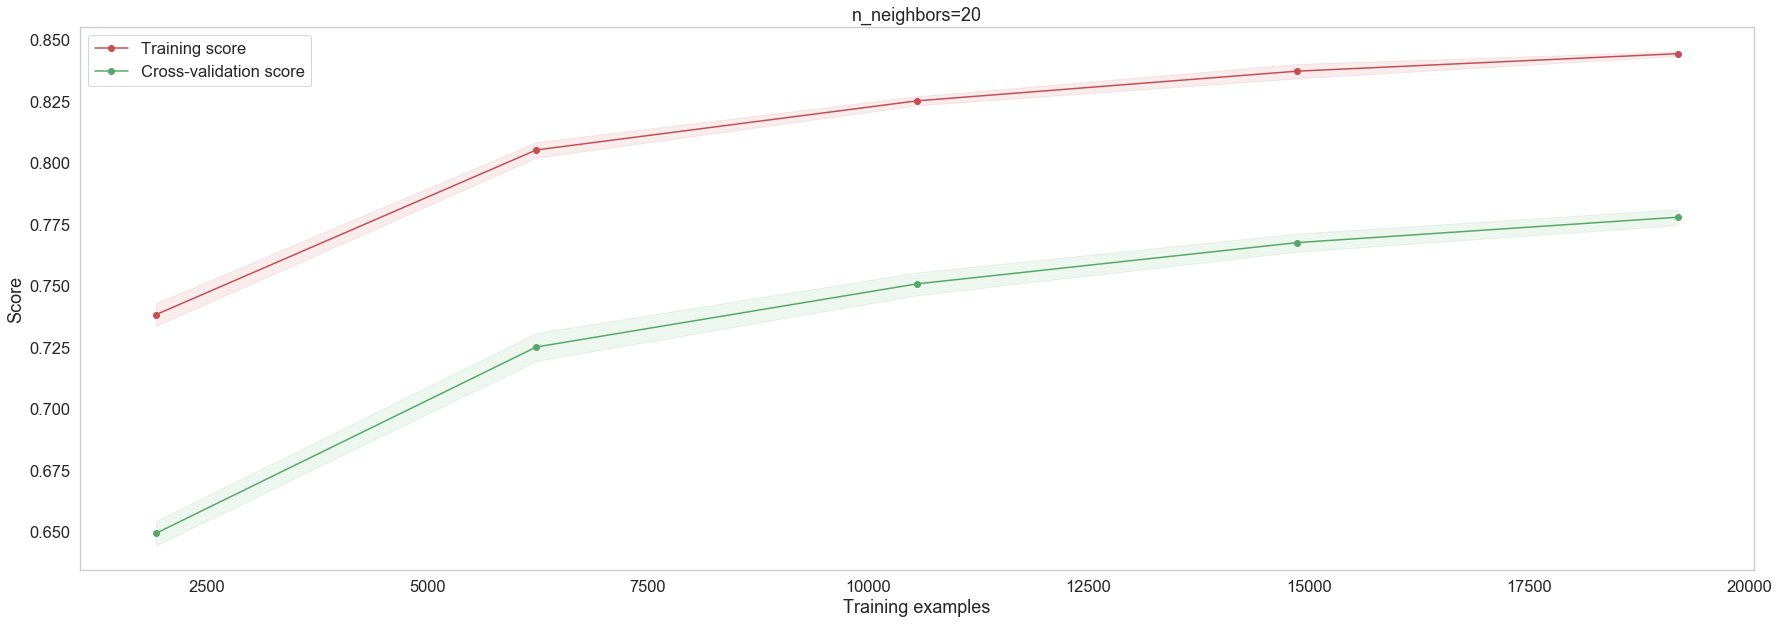

In [52]:
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=20',
                   x_test, y_test)

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\pisar\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

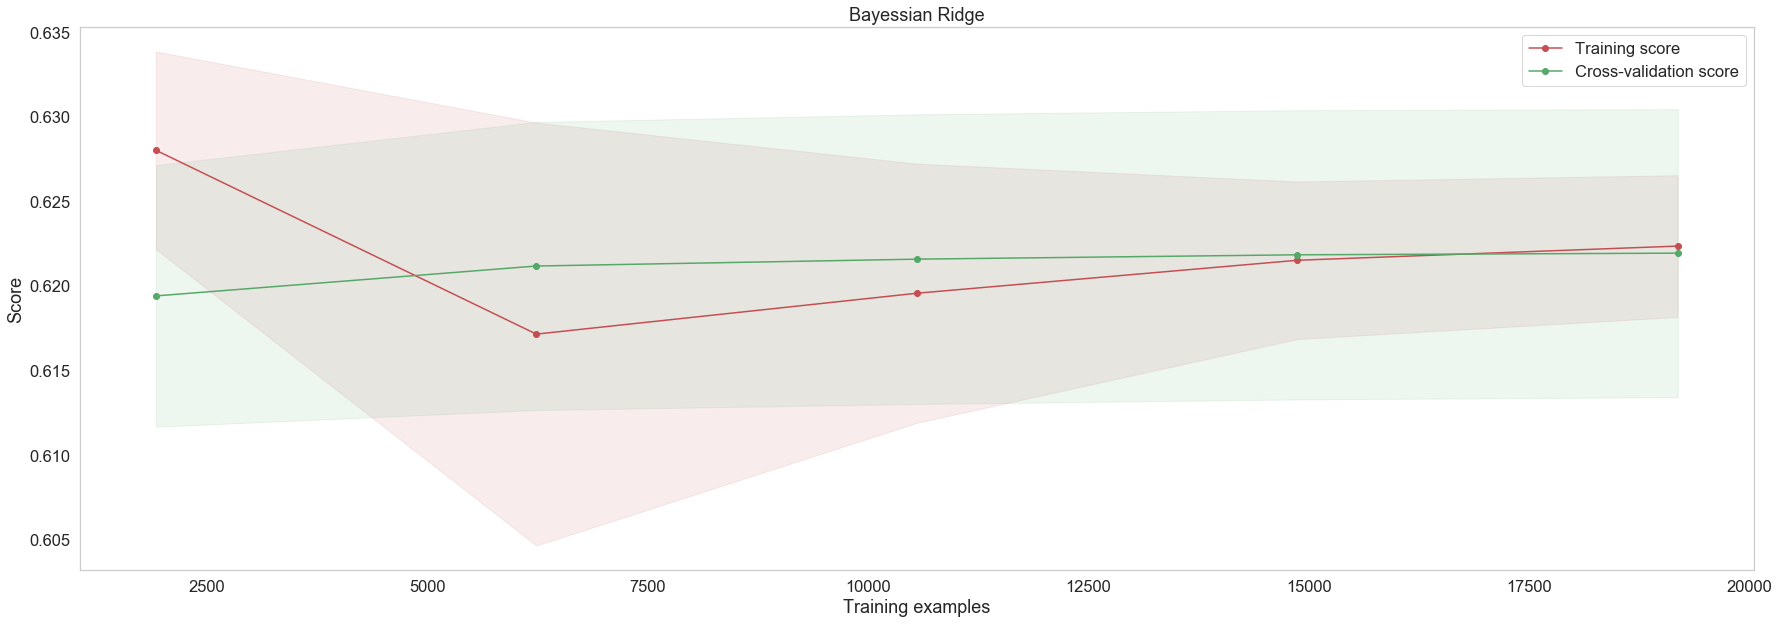

In [53]:
plot_learning_curve(clf_brd.best_estimator_, "Bayessian Ridge", x_test, y_test)

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\pisar\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

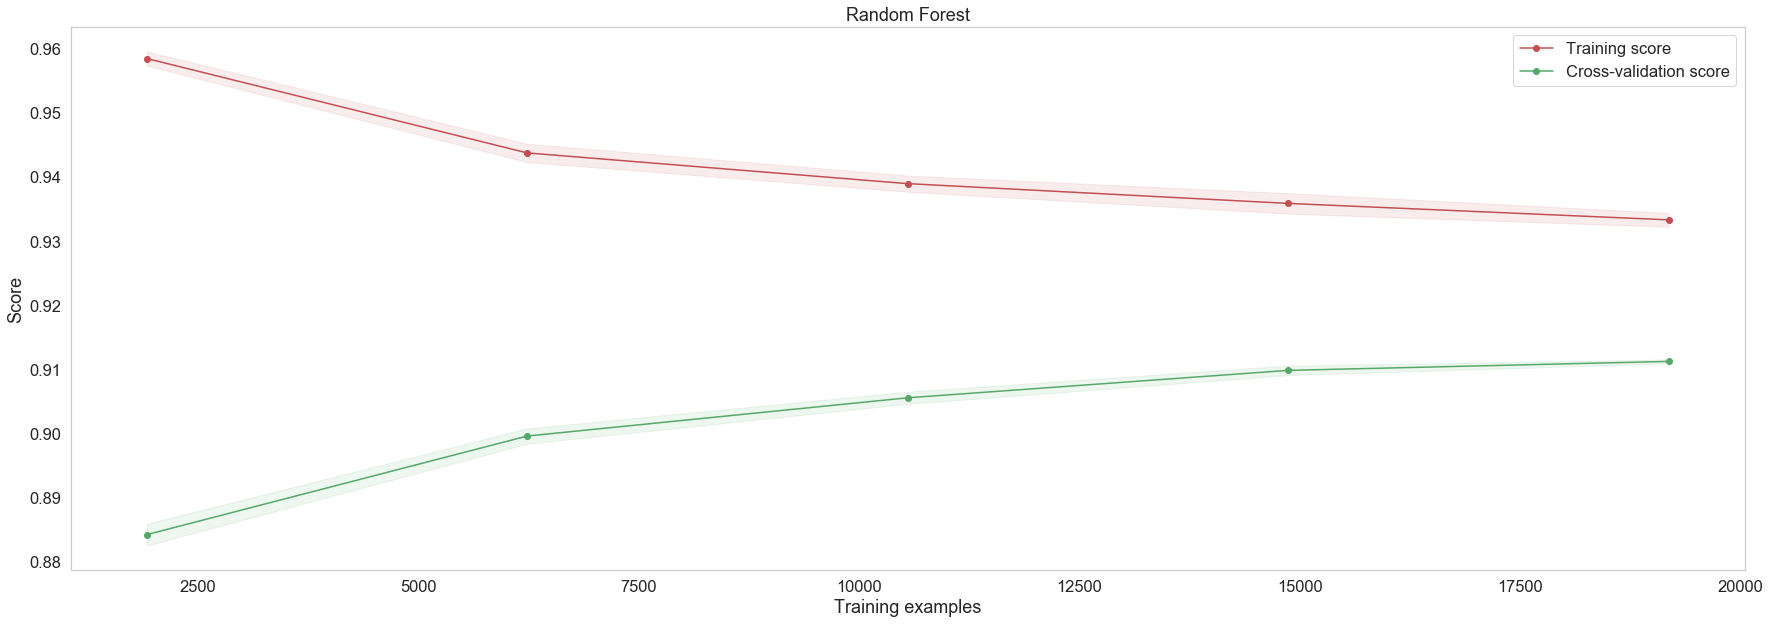

In [54]:
plot_learning_curve(best_random_forest.best_estimator_, "Random Forest", x_test, y_test)

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\pisar\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

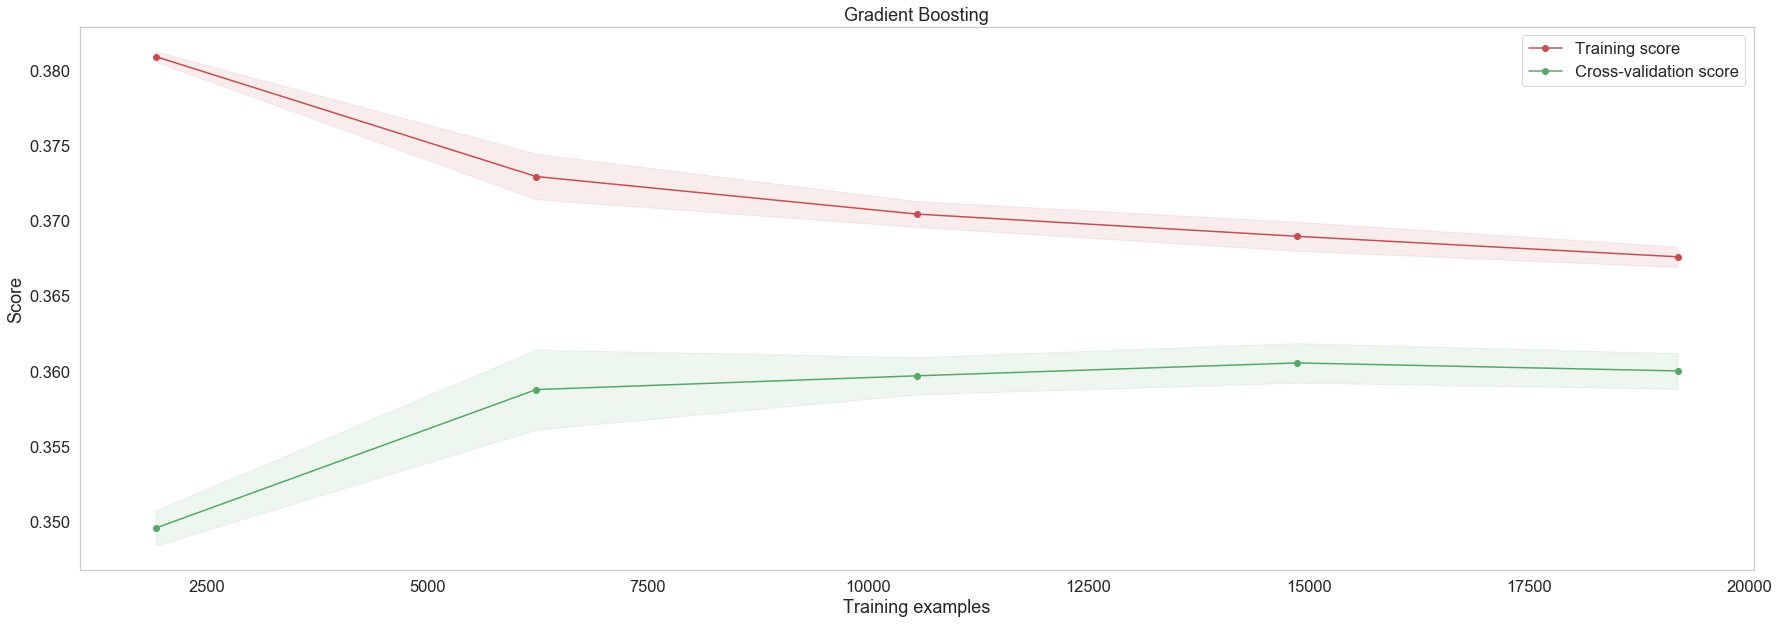

In [55]:
plot_learning_curve(best_gradient_boosting.best_estimator_, "Gradient Boosting", x_test, y_test)

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\pisar\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

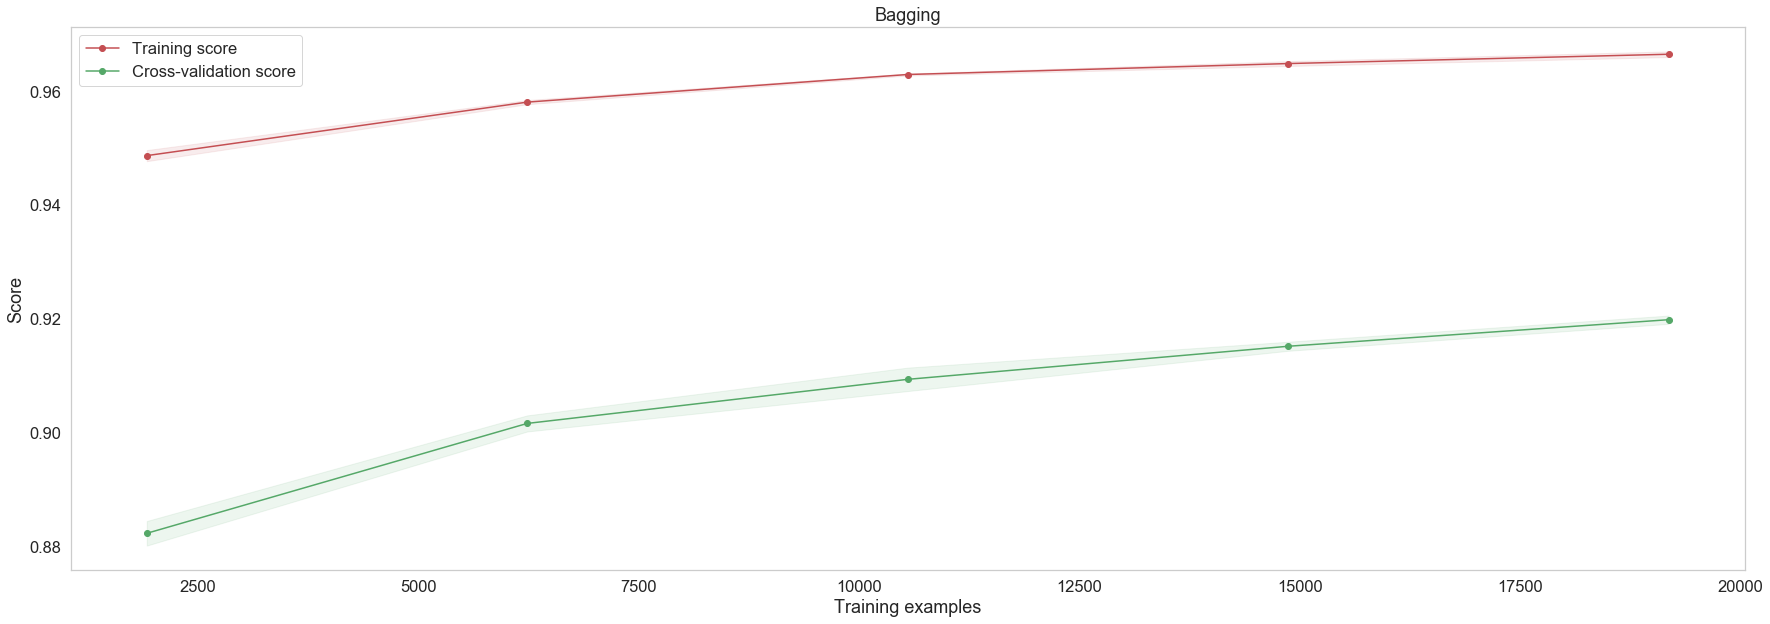

In [56]:
plot_learning_curve(clf_bg.best_estimator_, "Bagging", x_test, y_test)

**Построение кривых валидации**

In [57]:

def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(-31.1, 0.0)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\pisar\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

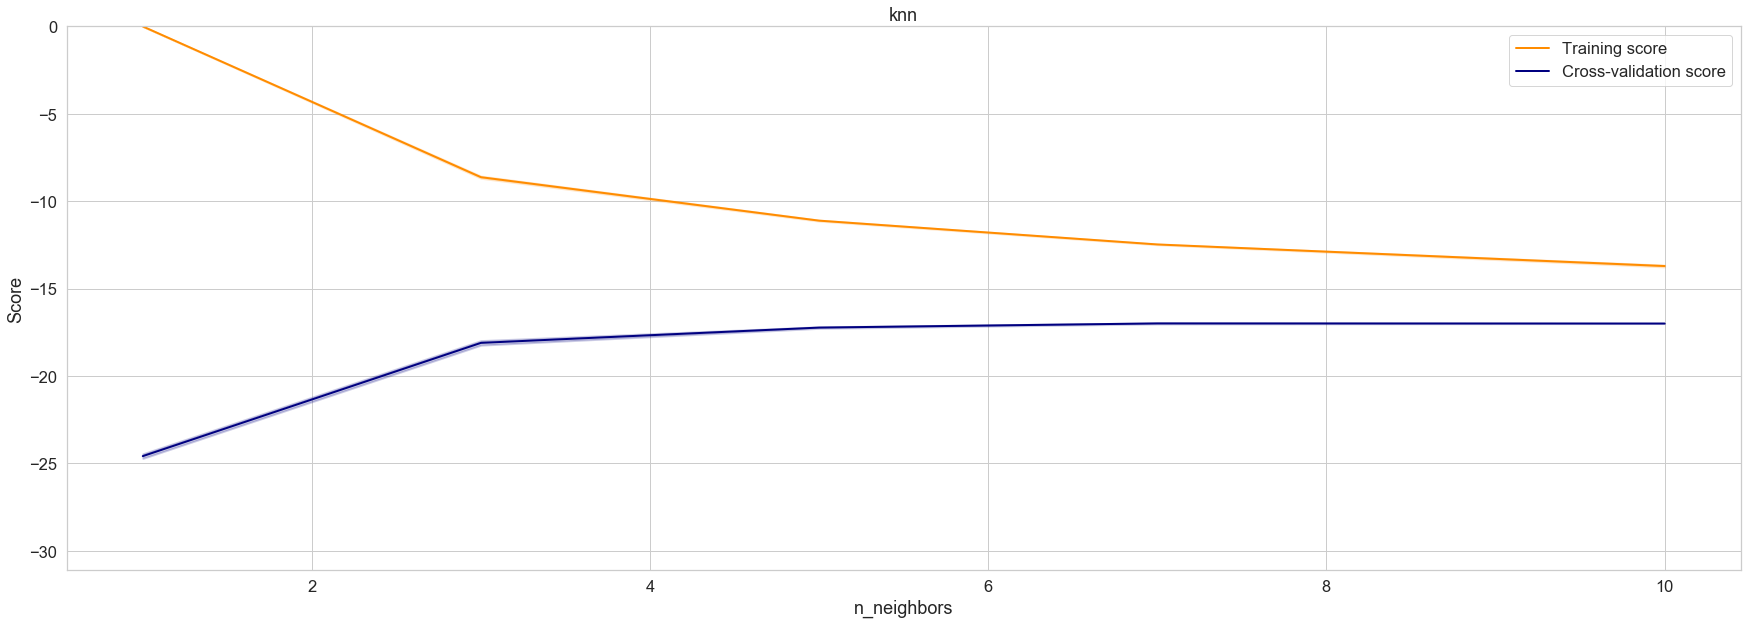

In [58]:
plot_validation_curve(clf_gs.best_estimator_, 'knn', x_train, y_train, param_name='n_neighbors', 
                      param_range=[1,3,5,7,10], cv=3,  scoring="neg_mean_squared_error")

<module 'matplotlib.pyplot' from 'C:\\Users\\pisar\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

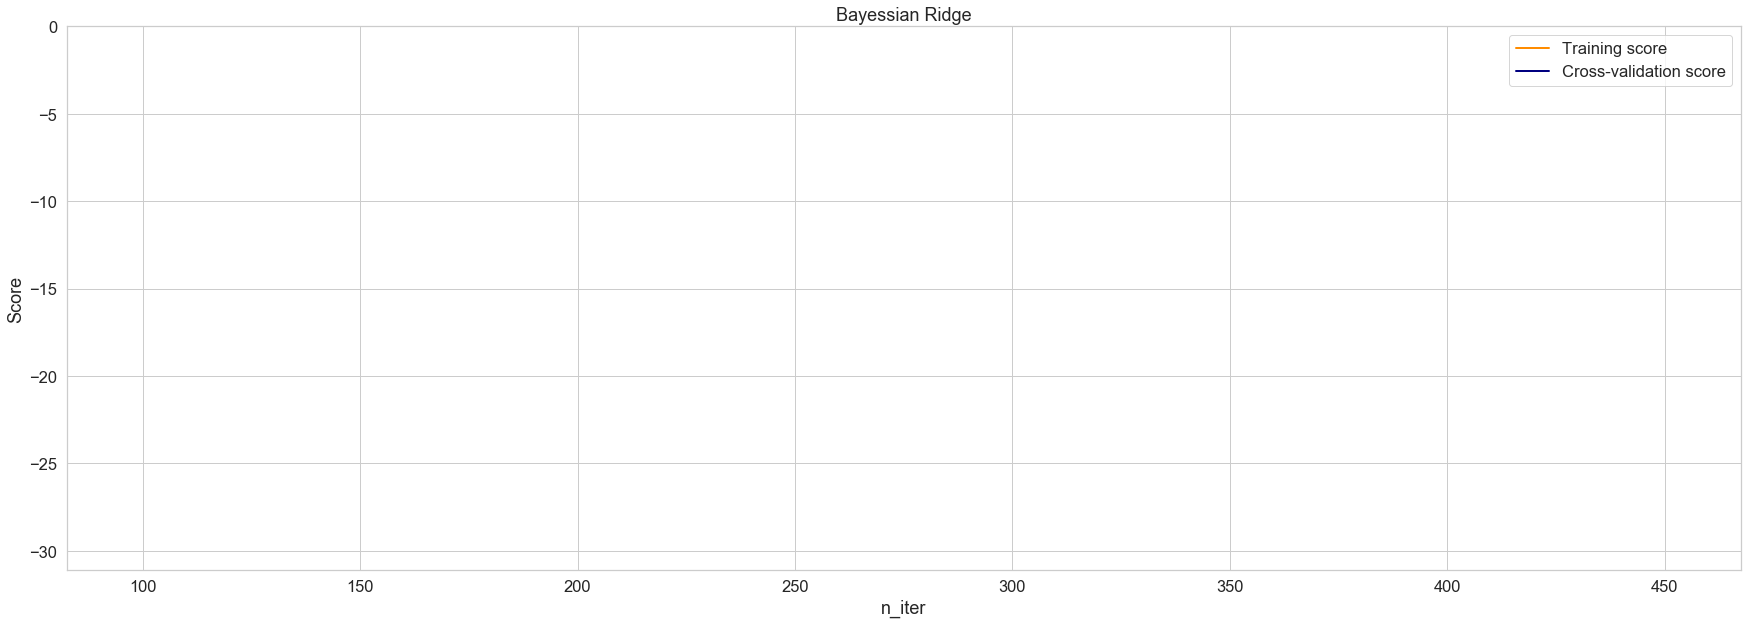

In [59]:
plot_validation_curve(clf_brd.best_estimator_, 'Bayessian Ridge', x_train, y_train, param_name='n_iter', 
                      param_range=range(100,500,50), cv=3,  scoring="neg_mean_squared_error")

<module 'matplotlib.pyplot' from 'C:\\Users\\pisar\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

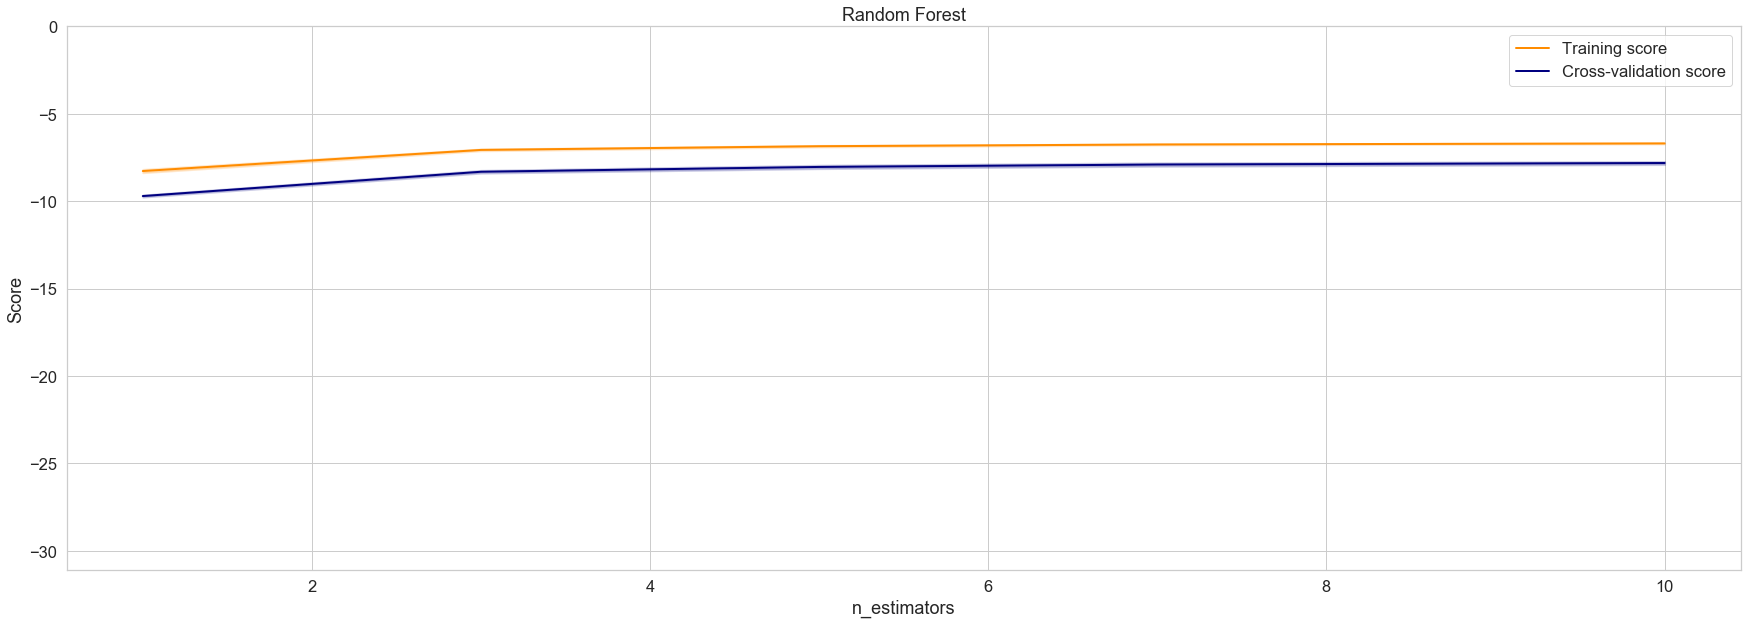

In [60]:
plot_validation_curve(best_random_forest.best_estimator_, 'Random Forest', x_train, y_train, param_name='n_estimators', 
                      param_range=[1,3,5,7,10], cv=3,  scoring="neg_mean_squared_error")

<module 'matplotlib.pyplot' from 'C:\\Users\\pisar\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

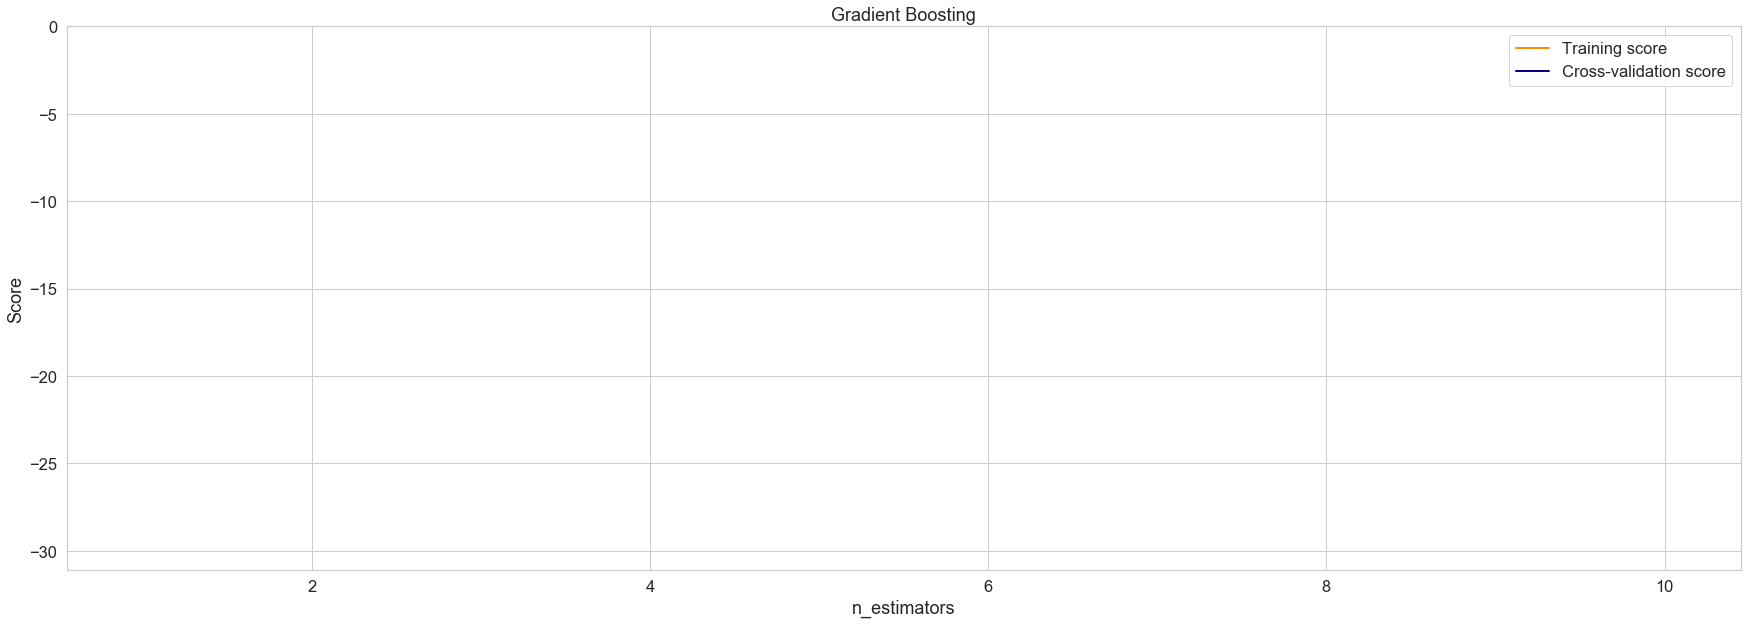

In [61]:
plot_validation_curve(best_gradient_boosting.best_estimator_, 'Gradient Boosting', x_train, y_train, param_name='n_estimators', 
                      param_range=[1,3,5,7,10], cv=3,  scoring="neg_mean_squared_error")

<module 'matplotlib.pyplot' from 'C:\\Users\\pisar\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

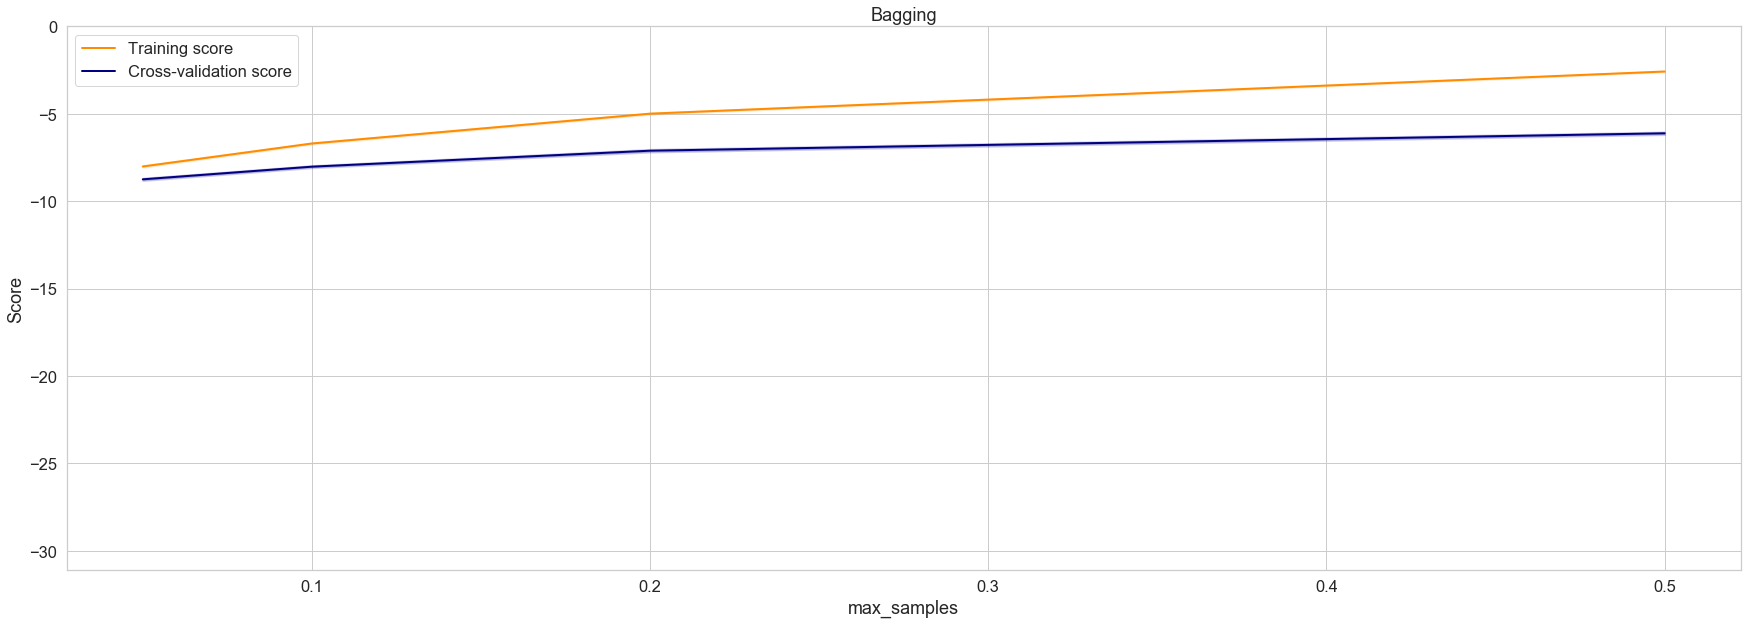

In [62]:
plot_validation_curve(clf_bg.best_estimator_, 'Bagging', x_train, y_train, param_name='max_samples', 
                      param_range=[0.05, 0.1, 0.2, 0.5], cv=3,  scoring="neg_mean_squared_error")

На основе полученных данных можно сделать вывод, что в данном случае модель Bagging показала наилучший результат.